# 1. - Introduction

In this notebook I am going to play around with a dataset extracted from Kaggle's user [Alberto Barradas'](https://www.kaggle.com/abcsds) account on Pokemon. The dataset can be found [here](https://www.kaggle.com/abcsds/pokemon). This Pokemon data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed. 

This are the raw attributes that are used for calculating how much damage an attack will do in the games:

-__#:__ ID for each pokemon

-__Name:__ Name of each pokemon

-__Type 1:__ Each pokemon has a type, this determines weakness/resistance to attacks

-__Type 2:__ Some pokemon are dual type and have 2

-__Total:__ sum of all stats that come after this, a general guide to how strong a pokemon is

-__HP:__ hit points, or health, defines how much damage a pokemon can withstand before fainting

-__Attack:__ the base modifier for normal attacks (eg. Scratch, Punch)

-__Defense:__ the base damage resistance against normal attacks

-__SP Atk:__ special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)

-__SP Def:__ the base damage resistance against special attacks

-__Speed:__ determines which pokemon attacks first each round

-__Generation__: number of the generation (as an integer) each pokemon belongs to.

-__Legendary__: whether the pokemon is legendary or not as a boolean value.

__One question has been answered with this database: The type of a pokemon cannot be inferred only by it's Attack and Deffence. It would be worthy to find which two variables can define the type of a pokemon, if any. Two variables can be plotted in a 2D space, and used as an example for machine learning. This could mean the creation of a visual example any geeky Machine Learning class would love.__

# 2.- Libraries

In [1]:
import pandas as pd
import seaborn as sns
import pandas_profiling
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\df\Anaconda3\lib\site-packages\matplotlib\__init__.py:1381: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


# 3.- Importing the Data

First of all, let's use Pandas to read the dataset.

In [2]:
pokemon = pd.read_csv("C:/Users/df/Documents/GitHub/Pokemon/Pokemon.csv")

Now, we can take a closer look at the data we have using *.head()*.

In [3]:
pokemon.head(10)

#                       Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1                  Bulbasaur  Grass  Poison    318  45      49       49   
1  2                    Ivysaur  Grass  Poison    405  60      62       63   
2  3                   Venusaur  Grass  Poison    525  80      82       83   
3  3      VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4                 Charmander   Fire     NaN    309  39      52       43   
5  5                 Charmeleon   Fire     NaN    405  58      64       58   
6  6                  Charizard   Fire  Flying    534  78      84       78   
7  6  CharizardMega Charizard X   Fire  Dragon    634  78     130      111   
8  6  CharizardMega Charizard Y   Fire  Flying    634  78     104       78   
9  7                   Squirtle  Water     NaN    314  44      48       65   

   Sp. Atk  Sp. Def  Speed  Generation Legendary  
0       65       65     45           1     False  
1       80       80     60           1     False  
2      100      100     80           1     False  
3      122      120     80           1     False  
4       60       50     65           1     False  
5       80       65     80           1     False  
6      109       85    100           1     False  
7      130       85    100           1     False  
8      159      115    100           1     False  
9       50       64     43           1     False

In [4]:
pandas_profiling.ProfileReport(pokemon) 

C:\Users\df\Anaconda3\lib\site-packages\pandas_profiling\base.py:99: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  plot.set_axis_bgcolor("w")


Using *pandas_profiling.ProfileReport()* will provide us with a very nice summary of all the pokemons' attributes. We can extract some useful information and analize it. Some of the hints we can get are:

- __Generation__ is highly correlated with # (ρ = 0.98252) so it is rejected when analyzing. For the veteran pokemon player this might seem obvious, since we can think of a pokemon generation as the new pokemon that were discovered in the pokemon world, thus needing a new number in the "pokedex". The more generations of pokemon were discovered the higher its classification number # was.


- __Legendary__ has 735 (91.9%) zeros. Legendary is a boolean variable that indicates whether the pokemon is a legend or not. Since Legendary pokemons are weird and scarce, it seems normal that it's an attribute where lots of zeros are found.


- __Type 2__ has 386 (48.3%) missing values Missing. Some pokemon only have one type and those who don't have a second type will have this attribute missing. The 3 more common type 2 are flying, ground and poison and the 3 less common types are electric, normal and bug.


- The 3 more common __pokemon type 1__ are water, normal and grass and the 3 less common types are ice, fairy and flying.

# 4.- Pokemon attributes

We will start exploring the distribution of all our variables by taking a look at the box and whisker plots

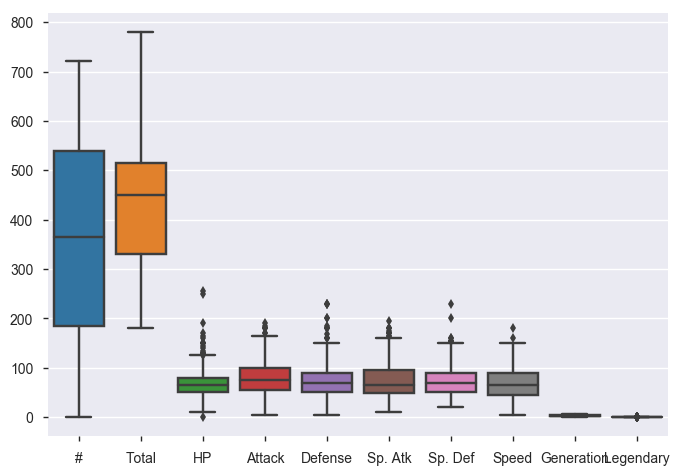

In [5]:
sns.boxplot(data=pokemon)
sns.plt.show()

As can be seen, the attributes __"#"__, __"Total"__, __"Generation"__ and __"Legendary"__ are somehow irrelevant to our study. The # variable is just an index to the position the pokemon is in the pokedex, same as "Generation". On the other hand, "Legendary" and "Total" appear to be in just a different scale

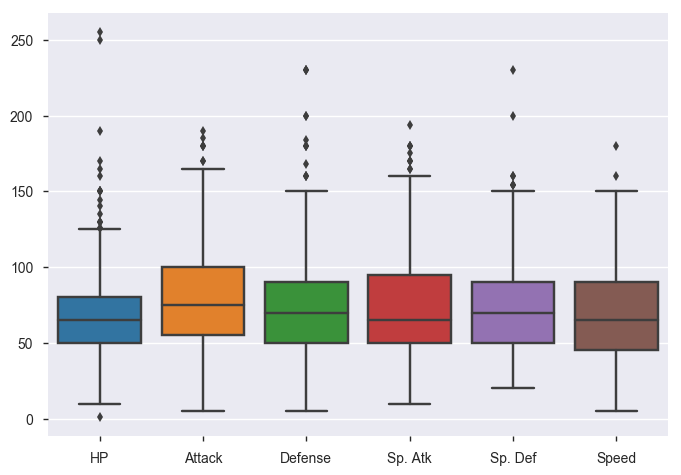

In [6]:
pokemon_fight_attributes = pokemon.drop(["#","Total","Generation", "Legendary"], axis = 1)
sns.boxplot(data = pokemon_fight_attributes)
sns.plt.show()

Now we are going to break down this attributes by Pokemon types, and for that, we will need to change our dataset a bit to avoid getting errors.

In [7]:
pokemon_by_types = pd.melt(pokemon_fight_attributes, id_vars = ["Name", "Type 1", "Type 2"], var_name = "Stat")
pokemon_by_types.head()

Name Type 1  Type 2 Stat  value
0              Bulbasaur  Grass  Poison   HP     45
1                Ivysaur  Grass  Poison   HP     60
2               Venusaur  Grass  Poison   HP     80
3  VenusaurMega Venusaur  Grass  Poison   HP     80
4             Charmander   Fire     NaN   HP     39

Now we can plot each pokemon stat broke down by pokemon type. We will use both matplotlib and seaborn to do it, creating the plot from scratch

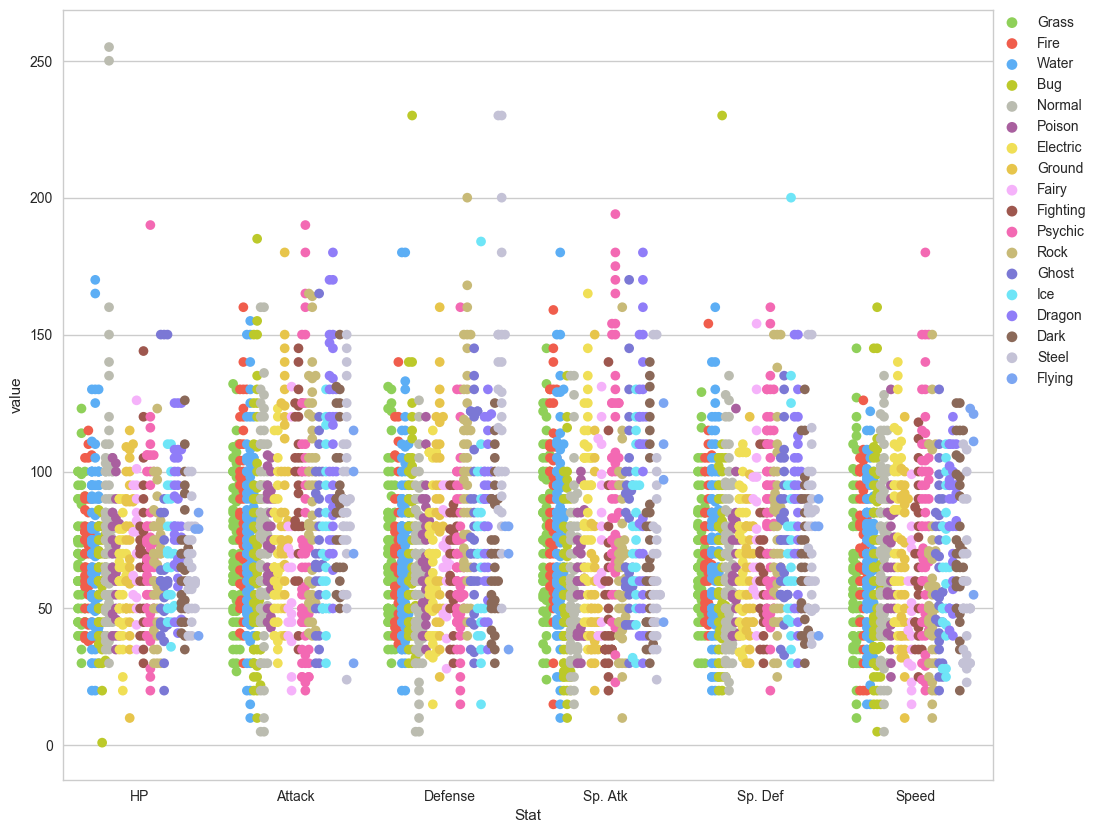

In [8]:
sns.set_style("whitegrid")
with sns.color_palette([
    "#8ED752", "#F95643", "#53AFFE", "#C3D221", "#BBBDAF",
    "#AD5CA2", "#F8E64E", "#F0CA42", "#F9AEFE", "#A35449",
    "#FB61B4", "#CDBD72", "#7673DA", "#66EBFF", "#8B76FF",
    "#8E6856", "#C3C1D7", "#75A4F9"], n_colors=18, desat=.9):
    plt.figure(figsize = (12,10))
    sns.swarmplot(x="Stat", y="value", data =pokemon_by_types, hue = "Type 1", split = True, size = 7)
    plt.legend(bbox_to_anchor = (1,1), loc = 2, borderaxespad = 0)

We can extract some useful information from this plot like:

- The types with the highest __HP__ are normal, psychic and water.
- The types with the highest __Attack__ are pyschic, bug and dragon.
- The types with the highest __Defense__ are bug, steel and rock.
- The types with the highest __Special Attack__ are psychic, ghost and water.
- The types with the highest __Special Defense__ are bug, ice and psychic.
- The types with the highest __Speed__ are psychic bug and rock.

# 5.- Legendary Pokemon

I haven't played pokemon since there were only 151 of them, so I don't have any idea of who the Legendary Pokemon are, nor if their stats are different from regular Pokemon, so let's find it out. First of all, we are going to filter the list of Legendary Pokemon.

In [9]:
legendary_pokemon = pokemon[pokemon["Legendary"] == True]
legendary_pokemon.shape

(65, 13)

So it seems that the list of Legendary pokemon has expanded from 6 pokemon in generation 1 to 65 pokemon in generation 6. Let's continue exploring some more stats about these pokemon. We can alternatevely look at different generations to find which generation has the biggest number of Legendary pokemon

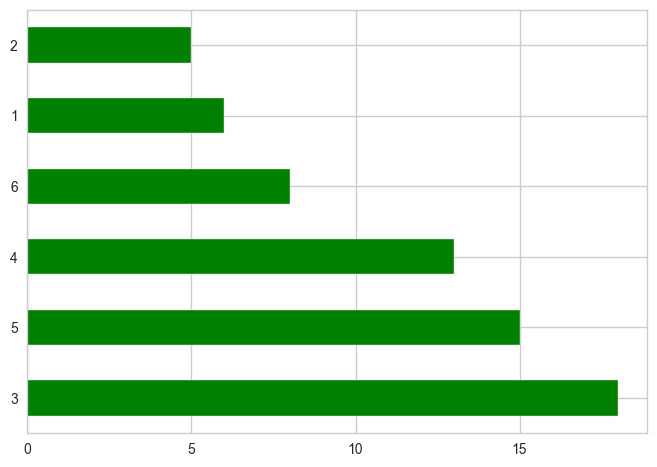

In [10]:
legendary_pokemon["Generation"].value_counts().plot(kind = 'barh', color = 'green')

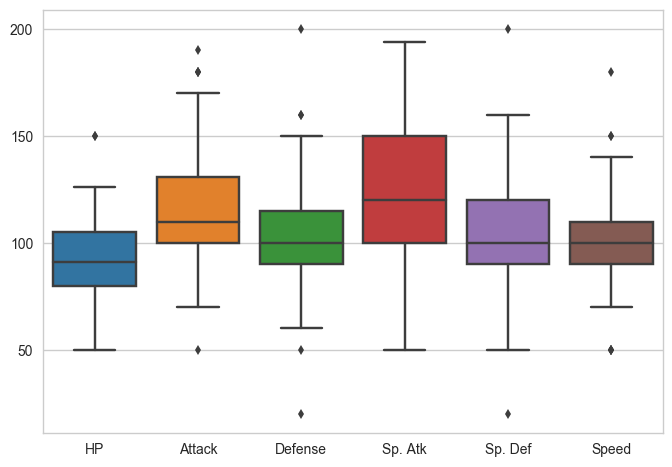

In [11]:
legendary_pokemon_figth_attributes = legendary_pokemon.drop(["#", "Total", "Generation", "Legendary"], axis = 1)
sns.boxplot(data = legendary_pokemon_figth_attributes)
sns.plt.show()

It seems normal to assume that Legendary pokemon are supposed to have better stats than the other pokemon, since they are weird to see and catch. Let's now look into Legendary pokemon's types 1 and 2.

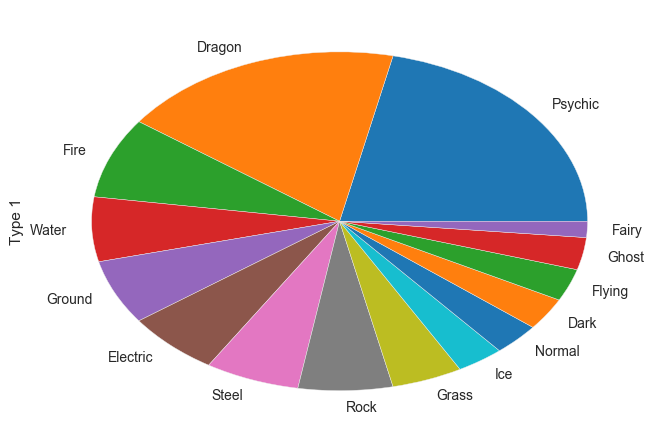

In [12]:
legendary_pokemon["Type 1"].value_counts().plot(kind = "pie")

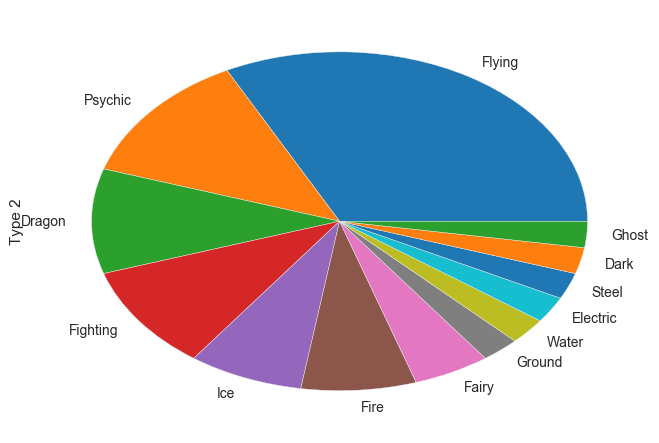

In [13]:
legendary_pokemon["Type 2"].value_counts().plot(kind = "pie")

Let's now find who is the most powerful Legendary Pokemon of each generation. To do so, we will define a function that takes a look at the "Total" column and return the most powerful Pokemon for a given generation.

In [14]:
def most_powerful_legendary(i):
    total = 0 
    poke=""
    for x, row in legendary_pokemon.iterrows():
        if row["Generation"] == i:
                if row["Total"] >= total:
                    total = row["Total"]
                    poke=row["Name"]
    return poke
                
most_powerful_legendary(3)

'RayquazaMega Rayquaza'